In [ ]:
'''
선형 회귀와 로지스틱 회귀
'''
#  선형 회귀분석의 기본 가정이란 회귀분석 대상 변수들이 가져야 할 1)선형성 2)독립성 3)등분산성 4)정규성 이라는 4가지 조건을 의미
#  분류 : 데이터 x의 여러 feature 값들을 이용하여 해당 데이터의 클래스 y를 추론하는 것
#  회귀 : 데이터 x의 여러 feature 값들을 이용하여 연관된 다른 데이터 y의 정확한 값을 추론하는 것



In [1]:
# 데이터셋 준비
from sklearn.datasets import load_boston
from sklearn import model_selection
import pandas as pd
import numpy as np

# 데이터 로드
boston = load_boston()
data, price = boston['data'], boston['target']
x_train, x_test, y_train, y_test = model_selection.train_test_split(data, price, test_size=0.2)

df = pd.DataFrame(x_train, columns=boston['feature_names'])
print("boston dataset의 차원: ", data.shape)
print("price의 차원", price.shape)
print("boston train dataset의 차원: ", x_train.shape)
print("boston test dataset의 차원: ", x_test.shape)

print("Boston dataset의 예시")
df.head() # data 요약

boston dataset의 차원:  (506, 13)
price의 차원 (506,)
boston train dataset의 차원:  (404, 13)
boston test dataset의 차원:  (102, 13)
Boston dataset의 예시


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.24522,0.0,9.90,0.0,0.544,5.782,71.7,4.0317,4.0,304.0,18.4,396.90,15.94
1,0.09068,45.0,3.44,0.0,0.437,6.951,21.5,6.4798,5.0,398.0,15.2,377.68,5.10
2,0.19539,0.0,10.81,0.0,0.413,6.245,6.2,5.2873,4.0,305.0,19.2,377.17,7.54
3,0.31533,0.0,6.20,0.0,0.504,8.266,78.3,2.8944,8.0,307.0,17.4,385.05,4.14
4,8.49213,0.0,18.10,0.0,0.584,6.348,86.1,2.0527,24.0,666.0,20.2,83.45,17.64


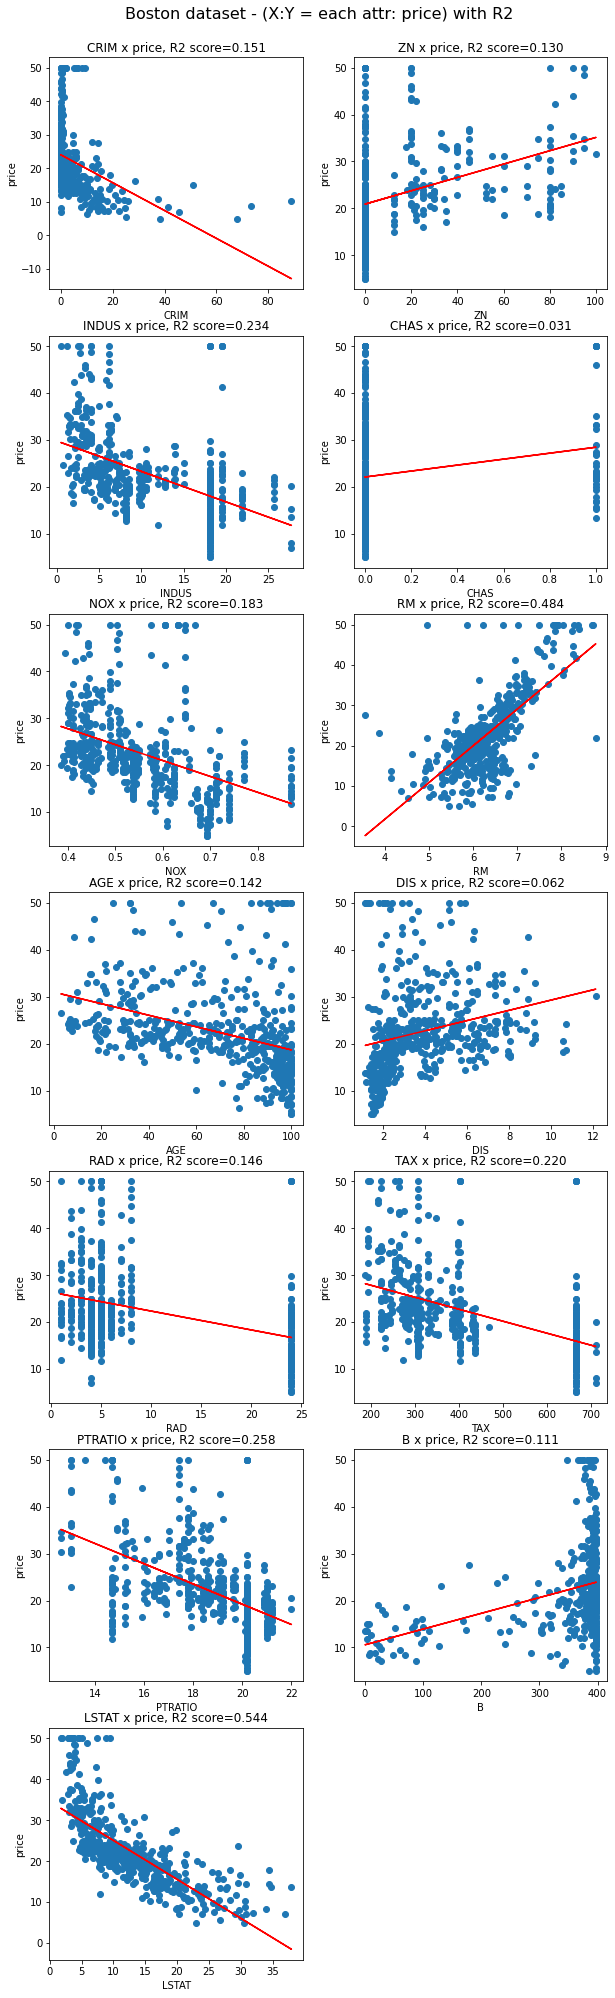

In [2]:
# Liner Regression 적용
# Boston dataset의 각 attribute에 선형회귀 적용하는 예제
import pandas as pd
from sklearn import datasets
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import datasets
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,35))
fig.suptitle('Boston dataset - (X:Y = each attr: price) with R2', fontsize=16, y=0.9)

for i in range(data.shape[1]): # boston dataset에서 i번째 attribute(column)을 살펴볼 거에요.

    single_attr, attr_name = data[:, i].reshape(-1, 1), boston['feature_names'][i] # i번째 attribute에 대한 data 및 이름
    estimator = LinearRegression() # 선형 회귀 모델이에요.

    #x에는 single_attr, y에는 price에 해당하는 데이터를 대입해서 최소제곱법을 이용하여 모델 내에서 W, b를 구하는 과정이에요
    estimator.fit(single_attr, price) 

    #위 fit() 과정을 통해 구한 회귀계수를 기반으로 회귀모델에 X값을 대입했을 때의 예측 Y 값이에요. 
    pred_price = estimator.predict(single_attr)

    score = metrics.r2_score(price, pred_price) # 결정계수를 구하는 함수에요. 

    # 캔버스 생성
    ax = fig.add_subplot(7, 2, i+1)
    ax.scatter(single_attr, price) # 실제 데이터에 대한 산포도
    ax.plot(single_attr, pred_price, color='red') # 선형회귀모델의 추세선
    ax.set_title("{} x price, R2 score={:.3f}".format(attr_name ,score)) #subplot의 제목이에요
    ax.set_xlabel(attr_name) # x축
    ax.set_ylabel('price') # y축

In [3]:
# Logistic Regression
'''
실제 데이터를 대입하여 Odds 및 회귀계수를 구한다.
Log-odds를 계산한 후, 이를 sigmoid function의 입력으로 넣어서 특정 범주에 속할 확률 값을 계산한다.
설정한 threshold에 맞추어 설정값 이상이면 1, 이하면 0으로 이진 분류를 수행한다.
'''
# 로지스틱 회귀분석 예제: 유방암 데이터셋
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# 데이터 로드
cancer=load_breast_cancer()

# y = 0(Malignant - 악성 종양), y=1(Benign - 양성 종양)
cancer_X, cancer_y= cancer.data, cancer['target']
train_X, test_X, train_y, test_y = train_test_split(cancer_X, cancer_y, test_size=0.1, random_state=10) # train 데이터셋과 test 데이터셋으로 나눔
print("전체 검사자 수: {}".format(len(cancer_X)))
print("Attribute 수: {}".format(len(cancer_X[0])))
print("Train dataset에 사용되는 검사자 수: {}".format(len(train_X)))
print("Test dataset에 사용되는 검사자 수: {}".format(len(test_X)))
cancer_df = pd.DataFrame(cancer_X, columns=cancer['feature_names'])
cancer_df.head()

전체 검사자 수: 569
Attribute 수: 30
Train dataset에 사용되는 검사자 수: 512
Test dataset에 사용되는 검사자 수: 57


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

LR = LogisticRegression() #로지스틱 회귀분석
LR.fit(train_X, train_y) # 유방암 train data를 이용하여 로지스틱 회귀분석 모델 학습
pred = LR.predict(test_X) # 학습된 로지스틱 회귀분석 모델을 이용한 예측값 출력


# 로지스틱 회귀분석 모델의 예측값과 실제값 비교결과를 나타낸 통계표
print(classification_report(test_y, pred))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93        21
           1       0.97      0.94      0.96        36

    accuracy                           0.95        57
   macro avg       0.94      0.95      0.94        57
weighted avg       0.95      0.95      0.95        57



/Users/ho/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [6]:
'''
Softmax 함수와 Cross Entropy
Logistic Regression
'''

# Tensorflow V1 code
import tensorflow.compat.v1 as tf
import numpy as np
tf.compat.v1.disable_eager_execution()

x = tf.placeholder(tf.float32, [None, 30]) # 30개의 attribute를 가진 유방암 데이터셋
y = tf.placeholder(tf.float32, [None, 2]) # 악성, 양성 label에 one-hot encoding을 적용하여 2차원이 될 예정 
num_classes = 2 # 악성, 양성
lr = 0.0003 # learning rate

W = tf.Variable(tf.random_normal([30, num_classes]), name='weight') # 가중치
b = tf.Variable(tf.random_normal([num_classes]), name='bias') # bias

logits = tf.matmul(x, W) + b # log-odds에 해당되는 값
hypothesis = tf.nn.softmax(logits) # log-odds에 softmax 적용한 값

loss_i = tf.nn.softmax_cross_entropy_with_logits(
    logits=logits, labels=y) # i번째 변수의 p(x)*log(q(x))
loss = tf.reduce_mean(loss_i) # 이를 모두 summation한 최종 loss function

#최적화함수로 gradient descent method 사용
optimizer = tf.train.GradientDescentOptimizer(learning_rate=lr).minimize(loss)

pred = tf.argmax(hypothesis, 1) # hypothesis의 결과 큰 값을 1, 작은 값을 0으로 매핑
correct_pred = tf.equal(pred, tf.argmax(y, 1)) # 예측값과 ground truth 값을 비교해서 같으면 True, 다르면 False
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32)) # True는 1, False는 0이 되기 때문에 전체 평균값이 결국 accuracy가 됩니다.


with tf.Session() as sess:
    sess.run(tf.global_variables_initializer()) # Tensorflow의 전역 변수 초기화
    one_hot_train_y = np.eye(num_classes)[train_y] # one-hot encoding을 수행한 train data 라벨
    one_hot_test_y = np.eye(num_classes)[test_y] # one-hot encoding을 수행한 test data 라벨
    
    # 전체 train data를 1000번 iteration
    for step in range(1000):
        sess.run(optimizer, feed_dict={x: train_X, y: one_hot_train_y}) # train data로 학습
        test_loss, test_acc= sess.run([loss, accuracy], feed_dict={x: test_X, y: one_hot_test_y}) #학습된 모델을 통해 측정한 test data의 loss 값 및 정확도
        if step % 10 == 0: # 10번째 step마다 print 수행
            print("Step {}, loss: {:.3f} accuracy: {:.3f}".format(
            step, 
            test_loss,
            test_acc
            ))

2021-07-23 15:35:42.724729: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2021-07-23 15:35:42.724760: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2021-07-23 15:35:42.728559: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-07-23 15:35:42.736314: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-07-23 15:35:42.758891: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Step 0, loss: 1090.944 accuracy: 0.632
Step 10, loss: 96.645 accuracy: 0.246
Step 20, loss: 82.769 accuracy: 0.316
Step 30, loss: 98.101 accuracy: 0.561
Step 40, loss: 43.170 accuracy: 0.158
Step 50, loss: 36.068 accuracy: 0.333
Step 60, loss: 77.052 accuracy: 0.368
Step 70, loss: 47.564 accuracy: 0.596
Step 80, loss: 21.102 accuracy: 0.596
Step 90, loss: 11.760 accuracy: 0.667
Step 100, loss: 44.362 accuracy: 0.368
Step 110, loss: 109.101 accuracy: 0.368
Step 120, loss: 94.621 accuracy: 0.368
Step 130, loss: 68.161 accuracy: 0.368
Step 140, loss: 79.851 accuracy: 0.368
Step 150, loss: 66.534 accuracy: 0.368
Step 160, loss: 60.745 accuracy: 0.368
Step 170, loss: 53.648 accuracy: 0.368
Step 180, loss: 47.822 accuracy: 0.368
Step 190, loss: 41.714 accuracy: 0.368
Step 200, loss: 34.952 accuracy: 0.368
Step 210, loss: 32.487 accuracy: 0.368
Step 220, loss: 25.148 accuracy: 0.439
Step 230, loss: 10.012 accuracy: 0.772
Step 240, loss: 5.344 accuracy: 0.877
Step 250, loss: 5.327 accuracy: 0.

In [7]:
# Tensorflow V2 code
import tensorflow as tf
from tensorflow import keras

n_dense=30
n_train_epoch=20
num_classes = 2 # 악성, 양성

model=keras.models.Sequential()
# 레이어를 여러장 쌓기
model.add(keras.layers.Dense(num_classes, use_bias=True, activation='softmax', input_shape=(30,)))

model.summary()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(train_X, train_y, epochs=n_train_epoch)

# 모델 시험
test_loss, test_accuracy = model.evaluate(test_X, test_y, verbose=1)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2)                 62        
Total params: 62
Trainable params: 62
Non-trainable params: 0
_________________________________________________________________
Train on 512 samples
Epoch 1/20


2021-07-23 15:36:11.677609: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2021-07-23 15:36:11.677629: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2021-07-23 15:36:11.683893: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-07-23 15:36:11.693972: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-07-23 15:36:11.781303: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-07-23 15:36:11.78

512/512 [==============================] - 0s 822us/sample - loss: 165.2082 - accuracy: 0.3730
Epoch 2/20
512/512 [==============================] - 0s 151us/sample - loss: 140.3717 - accuracy: 0.3730
Epoch 3/20
512/512 [==============================] - 0s 154us/sample - loss: 114.4628 - accuracy: 0.3730
Epoch 4/20
512/512 [==============================] - 0s 150us/sample - loss: 89.5853 - accuracy: 0.3730
Epoch 5/20
512/512 [==============================] - 0s 151us/sample - loss: 64.0130 - accuracy: 0.3730
Epoch 6/20
512/512 [==============================] - 0s 149us/sample - loss: 38.8219 - accuracy: 0.3867
Epoch 7/20
512/512 [==============================] - 0s 145us/sample - loss: 15.3502 - accuracy: 0.5254
Epoch 8/20
512/512 [==============================] - 0s 166us/sample - loss: 2.3371 - accuracy: 0.8301
Epoch 9/20
512/512 [==============================] - 0s 173us/sample - loss: 0.9057 - accuracy: 0.9199
Epoch 10/20
512/512 [==============================] - 0s 168us/s

/Users/ho/miniforge3/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py:2426: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '
2021-07-23 15:36:13.774948: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [9]:
# Deep learning model
import tensorflow as tf
from tensorflow import keras

n_dense=30
n_train_epoch=20
num_classes = 2 # 악성, 양성

model=keras.models.Sequential()

#레이어 3장을 추가
model.add(keras.layers.Dense(n_dense, input_shape=(30,), use_bias=True))
model.add(keras.layers.Dense(n_dense,  use_bias=True))
model.add(keras.layers.Dense(n_dense,  use_bias=True))

model.add(keras.layers.Dense(num_classes, use_bias=True, activation='softmax'))

model.summary()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(train_X, train_y, epochs=n_train_epoch)

# 모델 시험
test_loss, test_accuracy = model.evaluate(test_X, test_y, verbose=1)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

# 데이터셋이 적어서 레이어를 깊게 쌓아도 성능이 크게 유리하지 않음(로지스틱 회귀만으로도 충분)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_6 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_7 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_8 (Dense)              (None, 2)                 62        
Total params: 2,852
Trainable params: 2,852
Non-trainable params: 0
_________________________________________________________________
Train on 512 samples
Epoch 1/20
512/512 [==============================] - 0s 235us/sample - loss: 11.6033 - accuracy: 0.5312
Epoch 2/20
 32/512 [>.............................] - ETA: 0s - loss: 8.3454 - accuracy: 0.6250

2021-07-23 15:39:39.170700: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-07-23 15:39:39.191047: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-07-23 15:39:39.215115: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-07-23 15:39:39.220519: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


512/512 [==============================] - 0s 190us/sample - loss: 2.4199 - accuracy: 0.7715
Epoch 3/20
512/512 [==============================] - 0s 170us/sample - loss: 1.2619 - accuracy: 0.8594
Epoch 4/20
512/512 [==============================] - 0s 188us/sample - loss: 0.7069 - accuracy: 0.8906
Epoch 5/20
512/512 [==============================] - 0s 186us/sample - loss: 0.6760 - accuracy: 0.9043
Epoch 6/20
512/512 [==============================] - 0s 167us/sample - loss: 0.6938 - accuracy: 0.9004
Epoch 7/20
512/512 [==============================] - 0s 168us/sample - loss: 0.6097 - accuracy: 0.9102
Epoch 8/20
512/512 [==============================] - 0s 183us/sample - loss: 0.4562 - accuracy: 0.9102
Epoch 9/20
512/512 [==============================] - 0s 182us/sample - loss: 0.6374 - accuracy: 0.9082
Epoch 10/20
512/512 [==============================] - 0s 183us/sample - loss: 0.5999 - accuracy: 0.9004
Epoch 11/20
512/512 [==============================] - 0s 187us/sample - l

2021-07-23 15:39:41.123492: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
